### Employee Attrition Prediction

**Index No**: 215554D   
**Name**: SABAR SA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

Check for missing values & Data types

<Axes: >

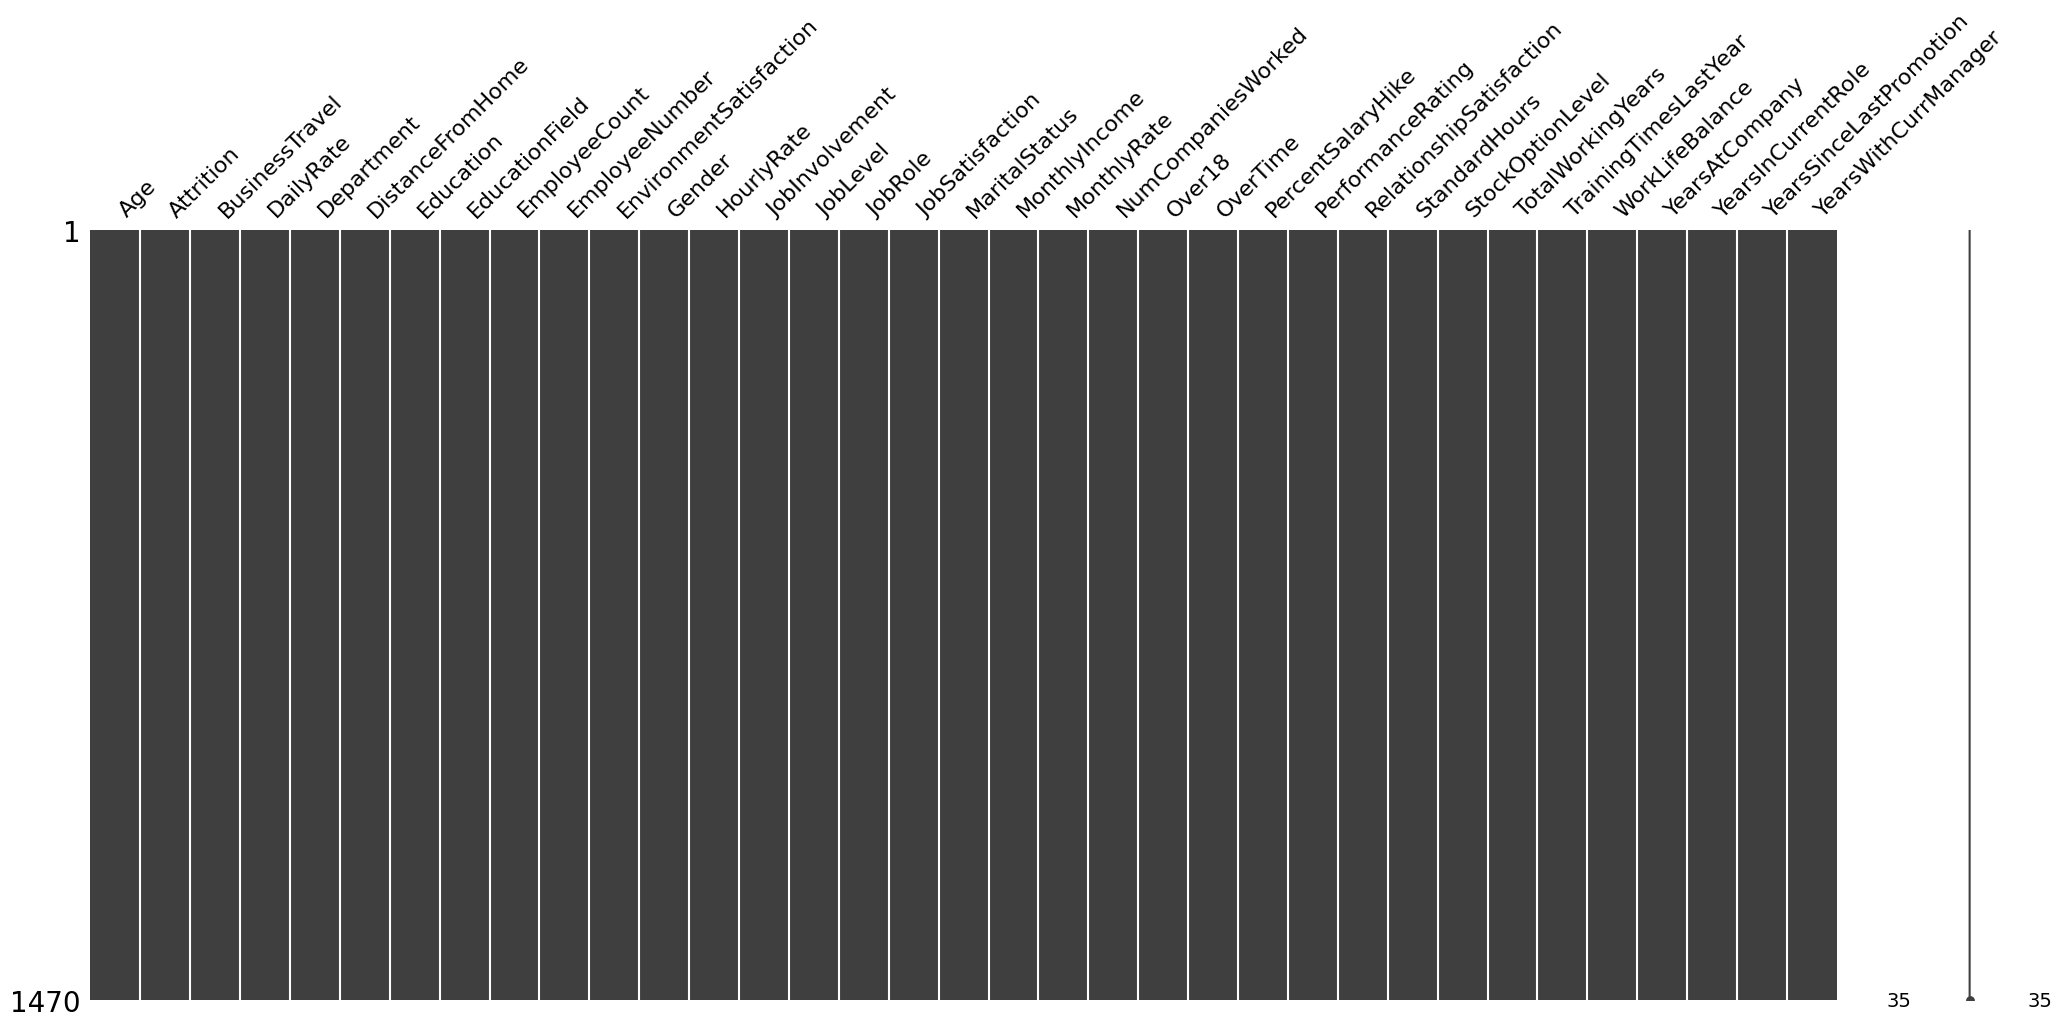

In [4]:
import missingno as msno

msno.matrix(data) 

Conclusion: There is no missing data

Checking Target Imbalance

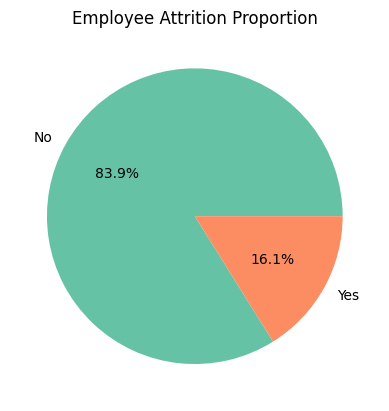

In [5]:
# Calculate class proportions
target_counts = data['Attrition'].value_counts()

# Plot pie chart
target_counts.plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], labels=target_counts.index)
plt.title('Employee Attrition Proportion')
plt.ylabel('')
plt.show()

Conclusion: The proportion is imbalanced

### Checking Outliers

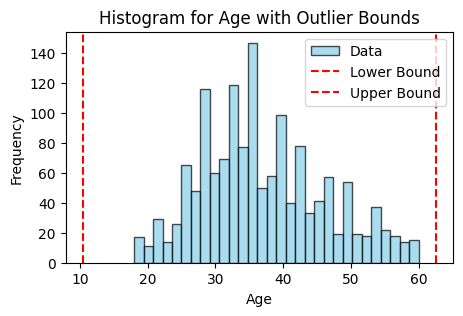

Column: Age, Outliers: 0


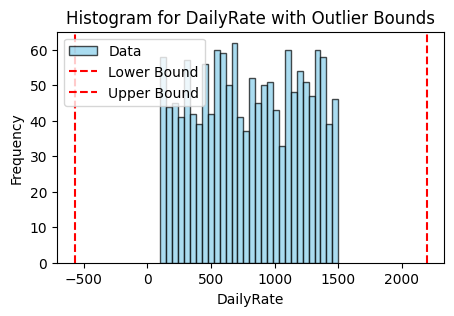

Column: DailyRate, Outliers: 0


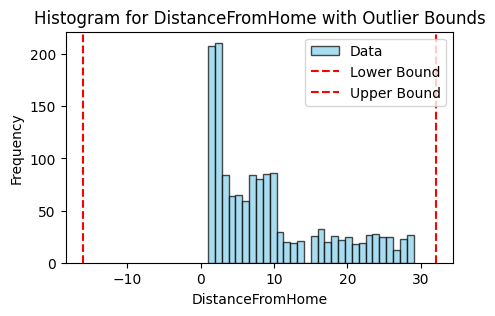

Column: DistanceFromHome, Outliers: 0


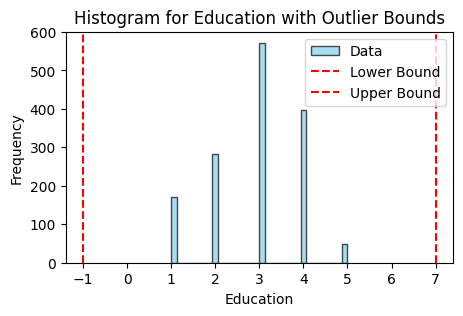

Column: Education, Outliers: 0


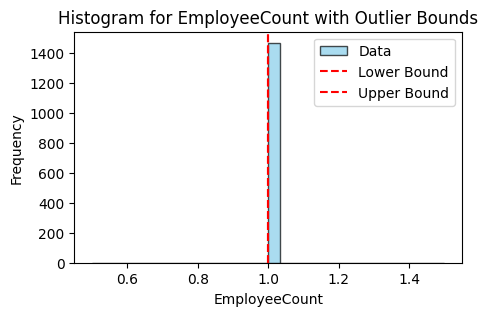

Column: EmployeeCount, Outliers: 0


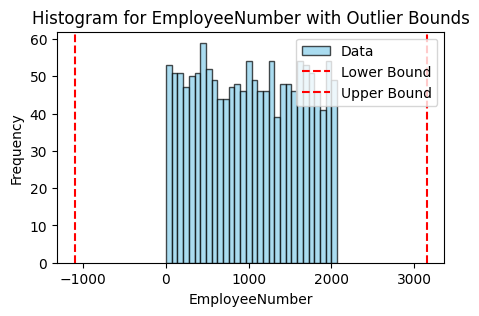

Column: EmployeeNumber, Outliers: 0


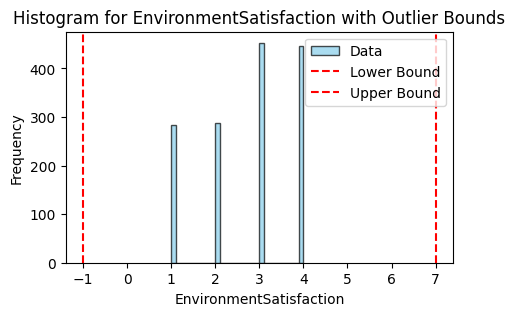

Column: EnvironmentSatisfaction, Outliers: 0


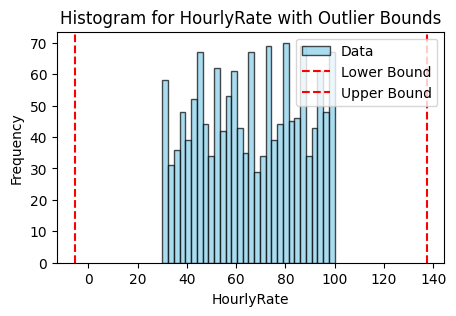

Column: HourlyRate, Outliers: 0


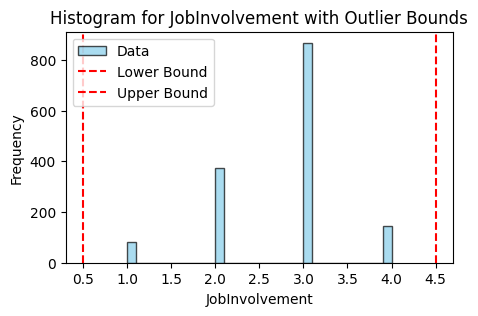

Column: JobInvolvement, Outliers: 0


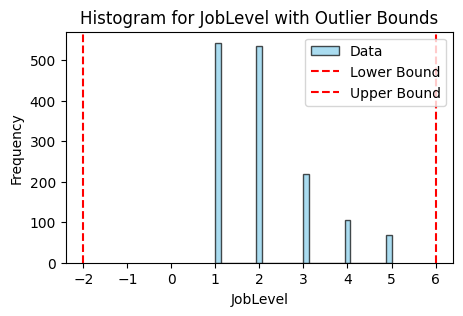

Column: JobLevel, Outliers: 0


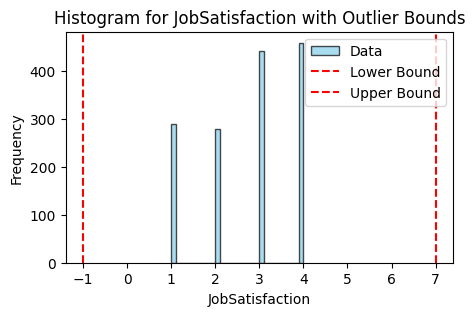

Column: JobSatisfaction, Outliers: 0


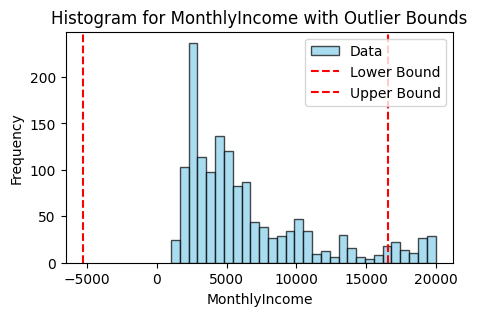

Column: MonthlyIncome, Outliers: 114


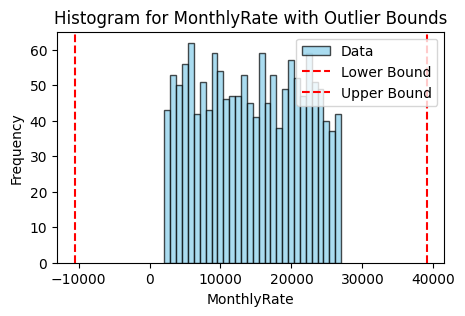

Column: MonthlyRate, Outliers: 0


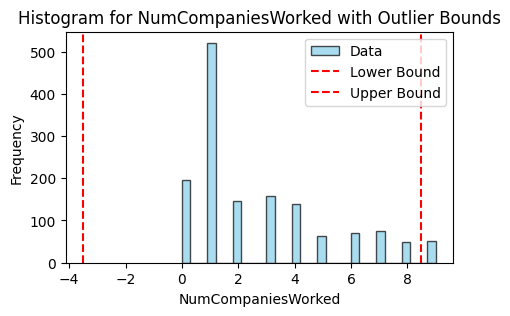

Column: NumCompaniesWorked, Outliers: 52


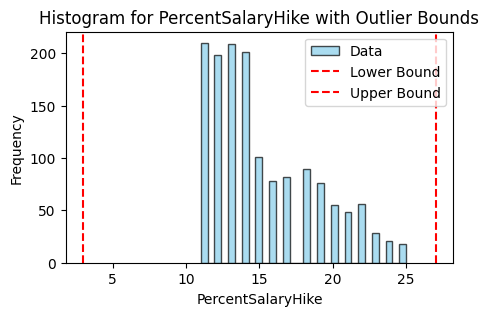

Column: PercentSalaryHike, Outliers: 0


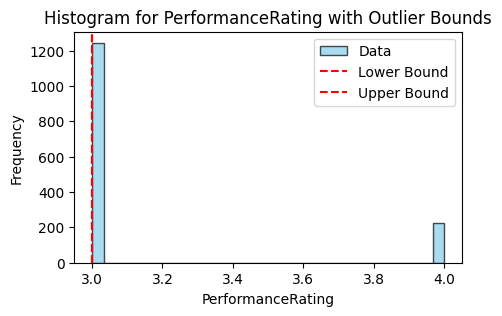

Column: PerformanceRating, Outliers: 226


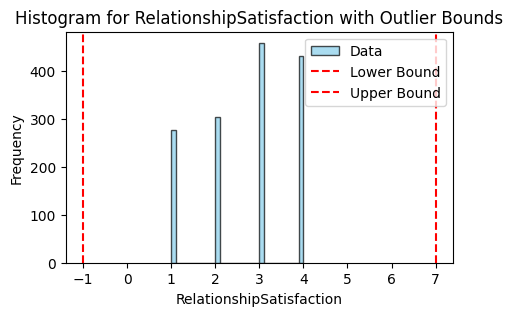

Column: RelationshipSatisfaction, Outliers: 0


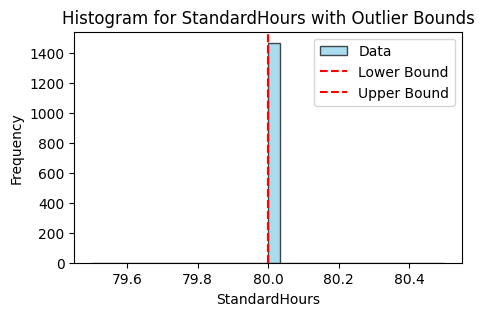

Column: StandardHours, Outliers: 0


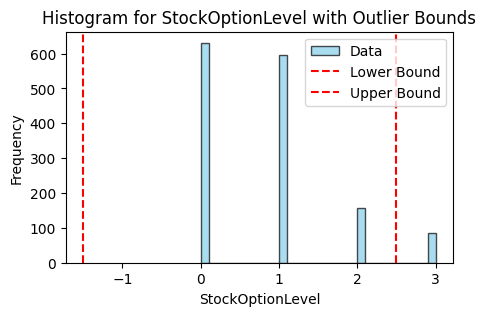

Column: StockOptionLevel, Outliers: 85


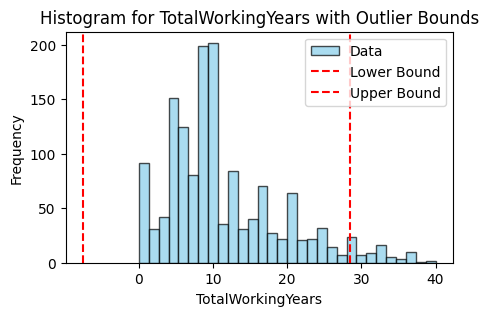

Column: TotalWorkingYears, Outliers: 63


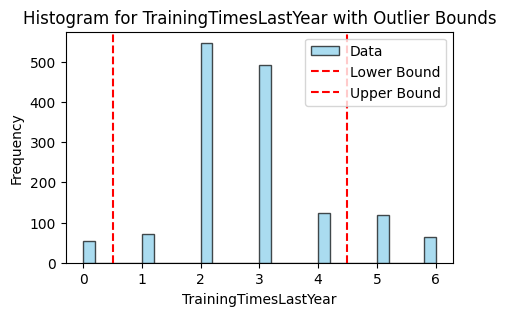

Column: TrainingTimesLastYear, Outliers: 238


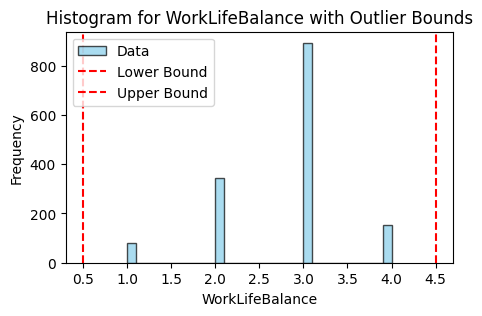

Column: WorkLifeBalance, Outliers: 0


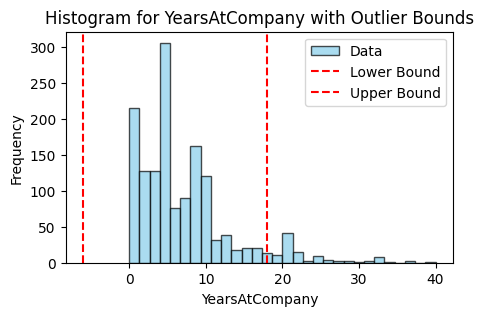

Column: YearsAtCompany, Outliers: 104


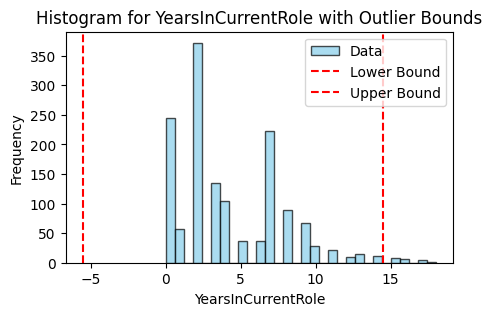

Column: YearsInCurrentRole, Outliers: 21


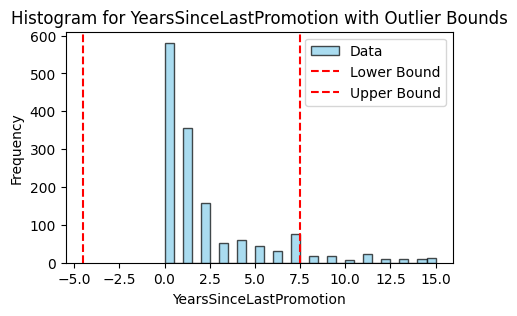

Column: YearsSinceLastPromotion, Outliers: 107


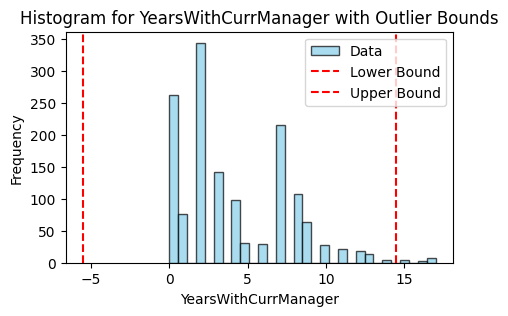

Column: YearsWithCurrManager, Outliers: 14


In [7]:
# Define a function to calculate outliers based on IQR
def detect_outliers_iqr(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
     # Plot histogram with bounds
    plt.figure(figsize=(5, 3))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Data')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f"Histogram for {column} with Outlier Bounds")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    return outliers

# Check for outliers in numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    outliers = detect_outliers_iqr(data, column)
    print(f"Column: {column}, Outliers: {len(outliers)}")


Conclusion: In the graph there are no distinctive outliers, hence no need to remove any values

### Feature Analysis

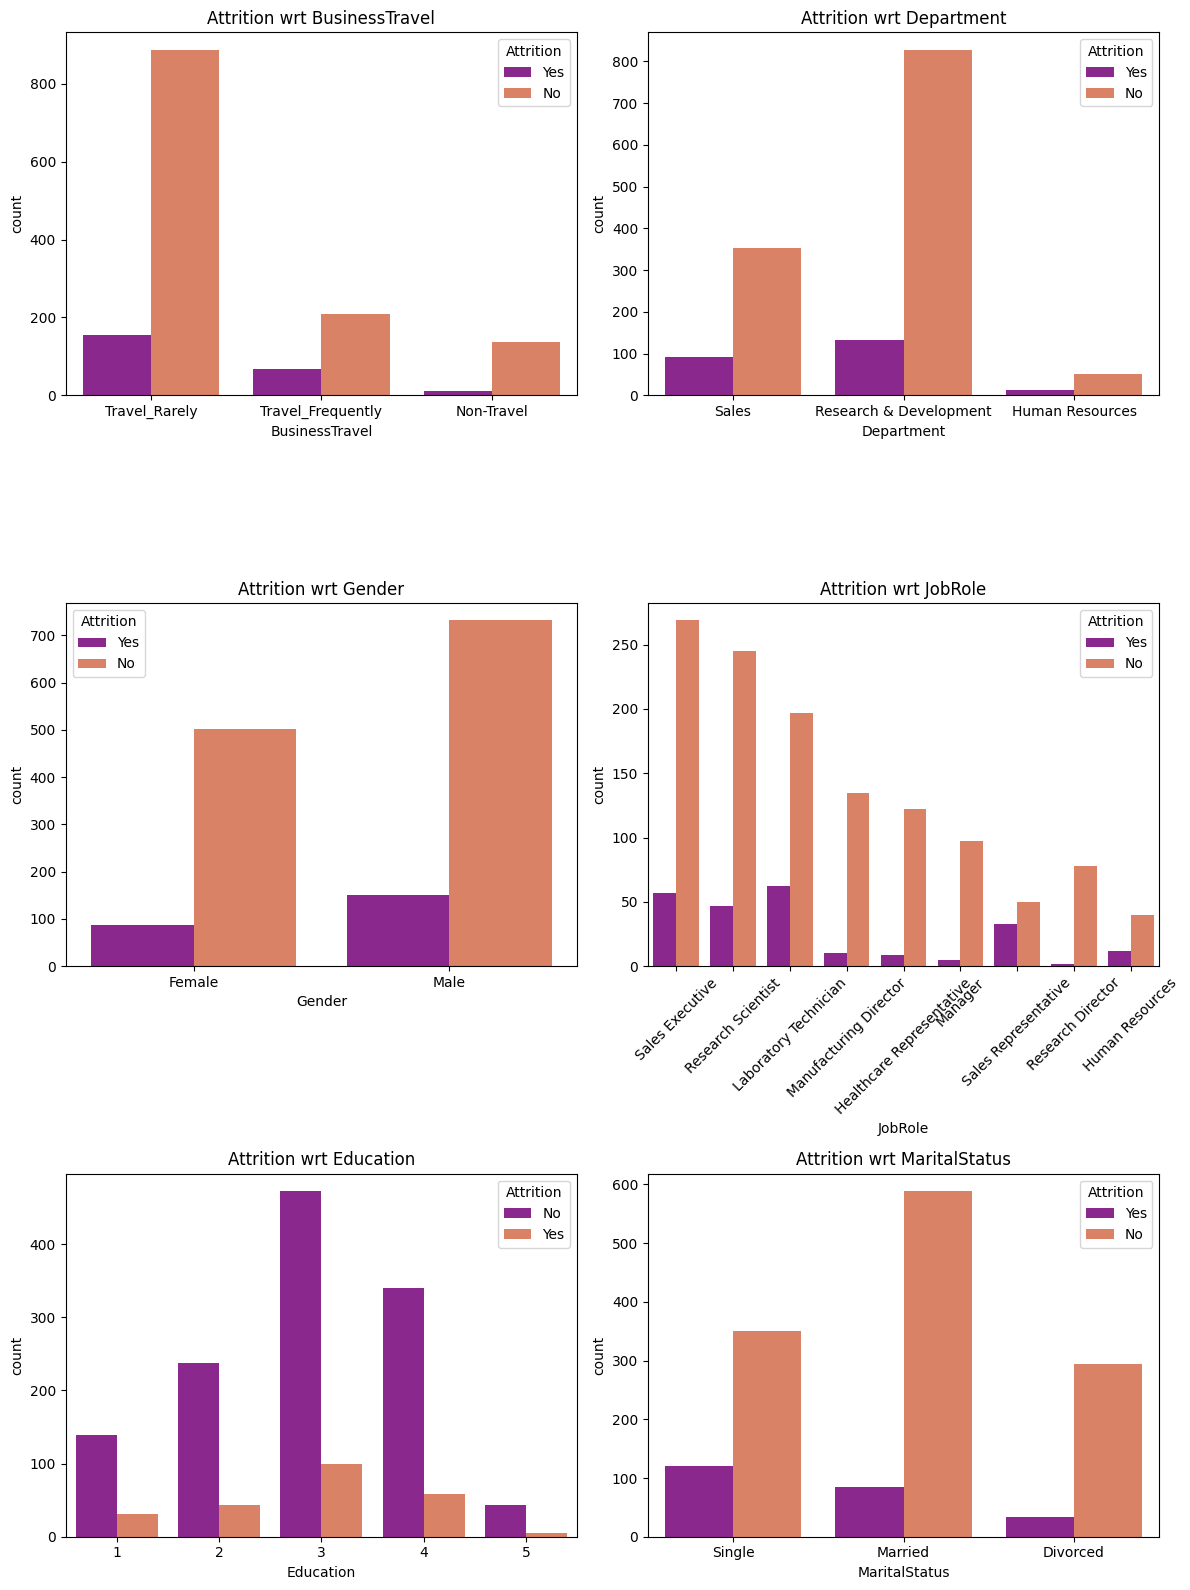

In [8]:
# Comparison of attrition wrt to categorical data columns
categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'Education', 'MaritalStatus']  # Example columns

plt.figure(figsize=(12,16))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)  
    sns.countplot(x=column, hue='Attrition', data=data, palette='plasma')
    plt.title(f"Attrition wrt {column}")
    if column == 'JobRole':
        plt.xticks(rotation=45)

    plt.tight_layout()
plt.show()

## Categorical Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

#encode the ordinal columns
categorical_columns = ['BusinessTravel','Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18']
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Manually encode the categorical columns
data['Attrition'] = data['Attrition'].replace({'No': 0, 'Yes': 1}).astype(int)
data['OverTime'] = data['OverTime'].replace({'No': 0, 'Yes': 1}).astype(int)
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1}).astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_31292\3069594015.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition'] = data['Attrition'].replace({'No': 0, 'Yes': 1}).astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_31292\3069594015.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['OverTime'] = data['OverTime'].replace({'No': 0, 'Yes': 1}).astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_31292\3069594015.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

### Feature Analysis

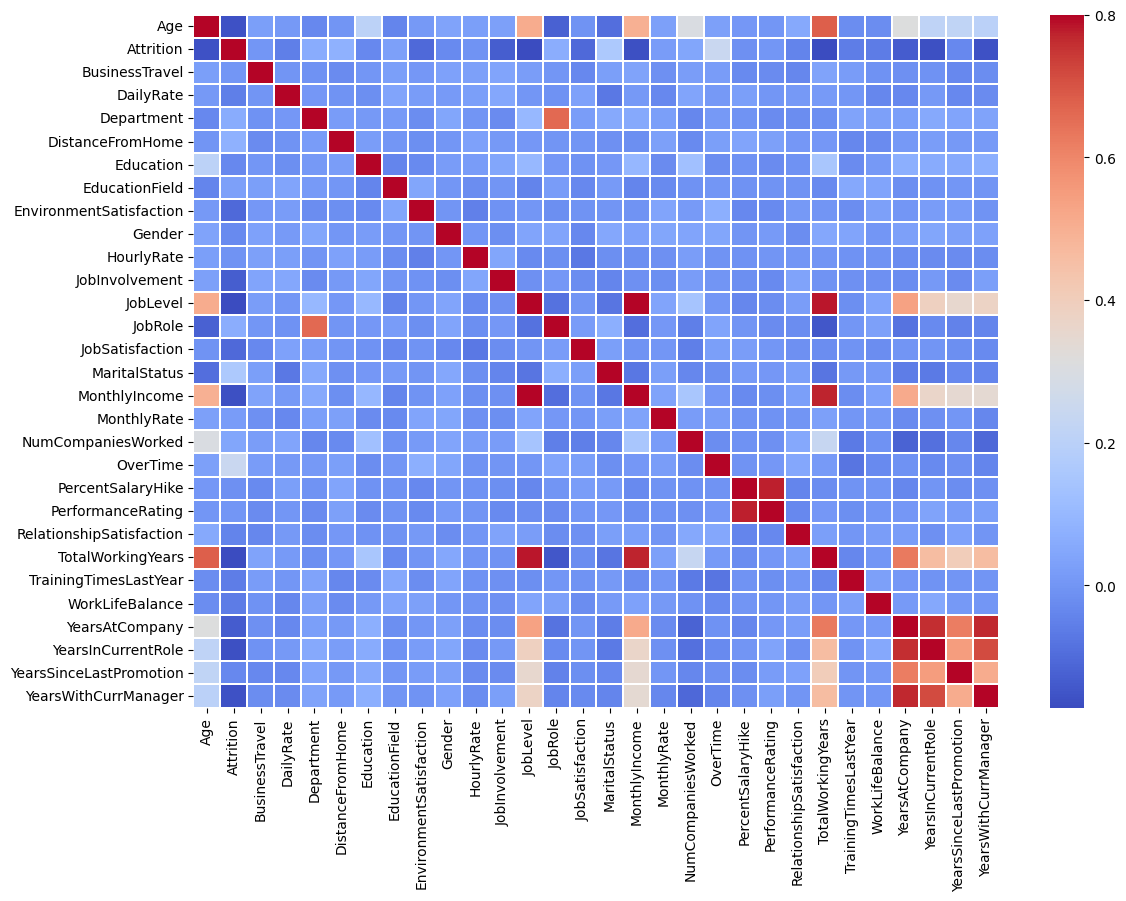

In [11]:
# Plot Correlation between all the data
plt.figure(figsize=(13,9))
sns.heatmap(data.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

## Drop Unnecessary Columns

In [10]:
data.drop(['EmployeeCount','EmployeeNumber','StandardHours', 'Over18', 'StockOptionLevel'],axis=1, inplace=True)

In [13]:
# Split features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [14]:
# Train-Test-Validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}, Validation set size: {len(X_val)}, Test set size: {len(X_test)}")

Training set size: 882, Validation set size: 294, Test set size: 294


## Resampling Technique to Balance Class Imbalance

In [15]:
# Oversampling the Minority Class
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Class distribution after resampling:
Attrition
0    726
1    726
Name: count, dtype: int64


### Standardize the Features

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training set and transform
X_val = scaler.transform(X_val)         # Transform validation set
X_test = scaler.transform(X_test)       # Transform test set

### Model Selection

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier

In [18]:
base_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss'))
]

In [19]:
results = {}

# Loop through each model, train it, and evaluate on the validation set
for name, model in base_models:
    model.fit(X_train, y_train)  # Train the model
    y_val_pred = model.predict(X_val)  # Predict on validation set
    
    # Calculate evaluation metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred, output_dict=True)
    try:
        roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])  # Assuming binary classification
    except ValueError:
        roc_auc = None  
    
    # Store results in dictionary
    results[name] = {
        "model": model,
        "accuracy": val_accuracy,
        "confusion_matrix": cm,
        "classification_report": class_report,
        "roc_auc": roc_auc
    }
    
    
    print(f"{name} Validation Accuracy: {val_accuracy:.4f}")

Logistic Regression Validation Accuracy: 0.8810
Random Forest Validation Accuracy: 0.8844
XGBoost Validation Accuracy: 0.8844


### Stacking Ensembling

In [20]:
# Define the meta-model (level-1 model), which will take the predictions from base models
meta_model = LogisticRegression(max_iter=1000)

# Create the Stacking Classifier ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [21]:
# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Evaluate stacking ensemble on validation set
y_val_pred_stacking = stacking_model.predict(X_val)
stacking_val_accuracy = accuracy_score(y_val, y_val_pred_stacking)

# Add stacking results
results['Stacking Ensemble'] = {
    "model": stacking_model,
    "accuracy": stacking_val_accuracy,
    "confusion_matrix": confusion_matrix(y_val, y_val_pred_stacking),
    "classification_report": classification_report(y_val, y_val_pred_stacking, output_dict=True),
    "roc_auc": roc_auc_score(y_val, stacking_model.predict_proba(X_val)[:, 1])  # Assumes binary classification
}

### Accuracy Results

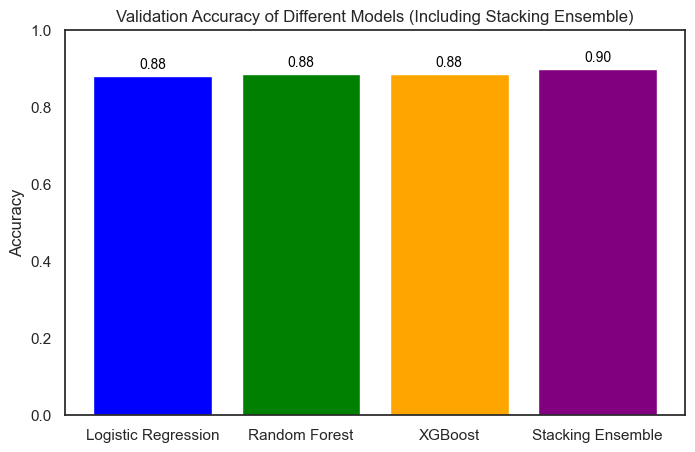

In [22]:
# Visualization of Validation Results
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.title("Validation Accuracy of Different Models (Including Stacking Ensemble)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
# Annotate accuracy values above each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10, color='black')
plt.show()

As you can see Stacking ensembling has increased the accuracy of the model by 0.02

### Confusion Matrix

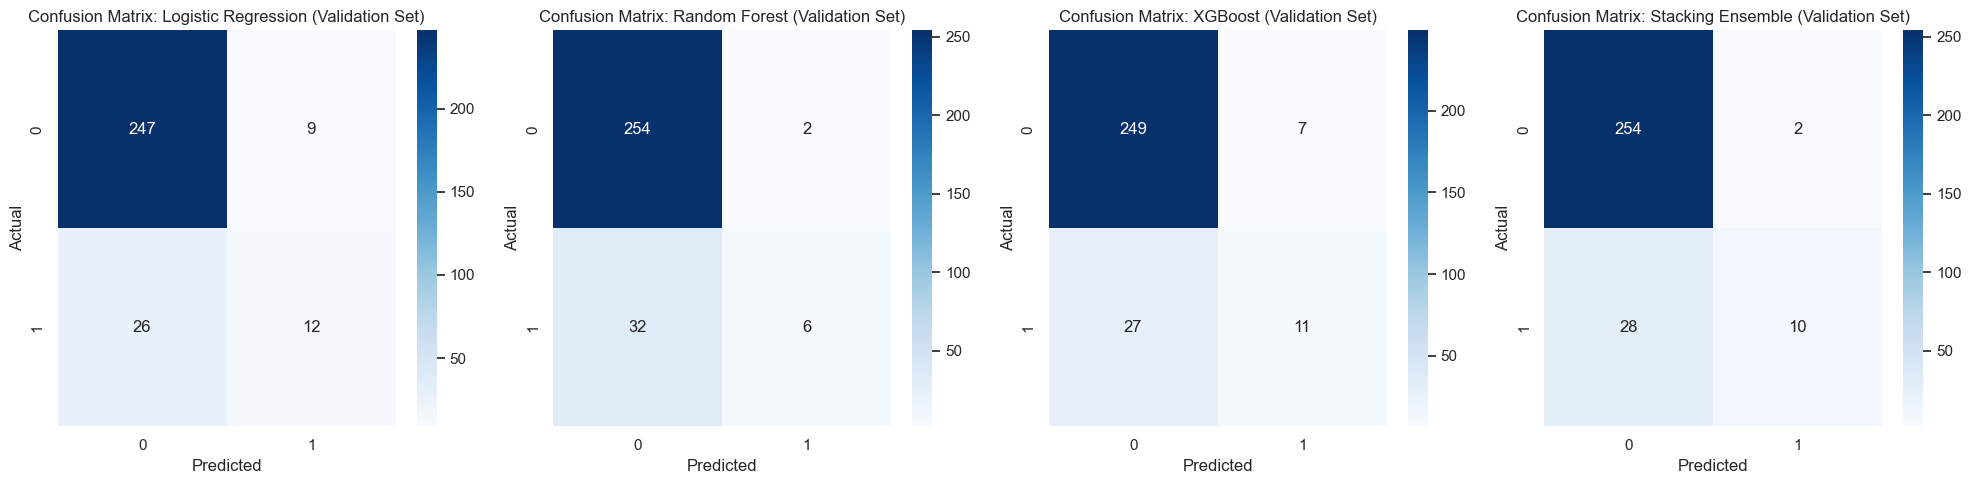

In [23]:
# Confusion Matrix Visualization (Validation Set)
plt.figure(figsize=(20, 5))
for i, model_name in enumerate(model_names):
    plt.subplot(1, len(model_names), i + 1)
    sns.heatmap(results[model_name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name} (Validation Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

### ROC-AUC Curve

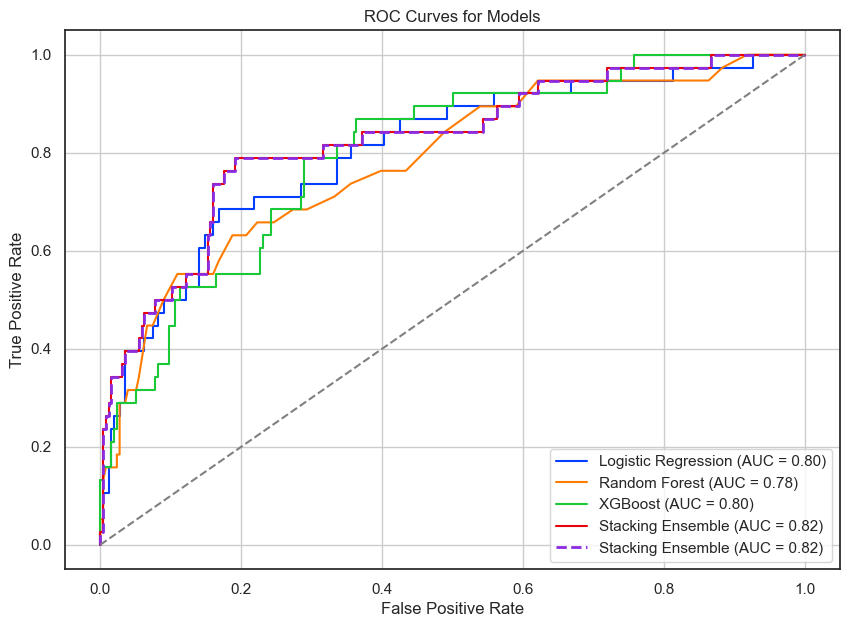

In [24]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, result in results.items():
    model = result['model']
    y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add Stacking Ensemble ROC Curve
stacking_proba = stacking_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, stacking_proba)
stacking_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Stacking Ensemble (AUC = {stacking_auc:.2f})", linestyle="--", linewidth=2)

# Plot random guess line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# ROC Curve formatting
plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Justification for using the models  

1. Logistic Regression - Helps to understand which features (e.g., salary, satisfaction) have the most significant effect on attrition.
2. Random Forest - Employee attrition is influenced by nonlinear relationships (e.g., interactions between job satisfaction and workload), which Random Forest captures well.
3. XGBoost - Complex interactions and subtle patterns in employee behavior can be captured more effectively with gradient boosting.


I have done stacking ensembling to deal with a complex dataset like employee attrition prediction, where relationships are nonlinear and interactions between features are significant. So using Stacking ensembling helps to  to combine the strengths of the individual models, improving generalization and performance.